# üìä 5Îã®Í≥Ñ: Í≤∞Í≥º Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî

## üìã Î™©Ìëú
- ÏµúÏ¢Ö Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê Î∞è Î∂ÑÏÑù
- Feature Importance Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî
- ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî Î∞è Ìï¥ÏÑù
- Î™®Îç∏ ÏÑ±Îä• ÏßÄÌëú Ï¢ÖÌï© Ï†ïÎ¶¨

## üéØ Ï£ºÏöî ÎÇ¥Ïö©
1. **ÏµúÏ¢Ö Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê**: Linear, Ridge, Lasso Î™®Îç∏ Ï¢ÖÌï© ÎπÑÍµê
2. **Feature Importance**: Í∞Å ÌäπÏÑ±Ïùò Ï§ëÏöîÎèÑ Î∂ÑÏÑù
3. **ÏòàÏ∏° vs Ïã§Ï†ú**: ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî Î∞è ÏûîÏ∞® Î∂ÑÏÑù
4. **ÏßÄÎ¶¨Ï†Å ÏòàÏ∏° Î∂ÑÏÑù**: ÏßÄÏó≠Î≥Ñ ÏòàÏ∏° ÏÑ±Îä• ÏãúÍ∞ÅÌôî

In [1]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Î®∏Ïã†Îü¨Îãù ÎùºÏù¥Î∏åÎü¨Î¶¨
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.inspection import permutation_importance

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
import sys
import os
sys.path.append(os.path.join('..', 'src'))
from font_setup import setup_korean_font

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï Ï†ÅÏö©
setup_korean_font()

# ÏãúÍ∞ÅÌôî Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Í≤ΩÍ≥† Î©îÏãúÏßÄ Ïà®Í∏∞Í∏∞
import warnings
warnings.filterwarnings('ignore')

print("‚úÖ ÎùºÏù¥Î∏åÎü¨Î¶¨ import ÏôÑÎ£å")

‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å: Malgun Gothic
‚úÖ ÎùºÏù¥Î∏åÎü¨Î¶¨ import ÏôÑÎ£å


## üìà 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è Î™®Îç∏ ÌõàÎ†®

In [2]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target
feature_names = california_housing.feature_names

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ± (Î∂ÑÏÑù Ìé∏ÏùòÎ•º ÏúÑÌï¥)
df_train = pd.DataFrame(X_train, columns=feature_names)
df_train['target'] = y_train

df_test = pd.DataFrame(X_test, columns=feature_names)
df_test['target'] = y_test

print(f"üìä ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: {X_train.shape[0]:,}Í∞ú ÏÉòÌîå")
print(f"üìä ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: {X_test.shape[0]:,}Í∞ú ÏÉòÌîå")
print(f"üìä ÌäπÏÑ± Í∞úÏàò: {X_train.shape[1]}Í∞ú")
print(f"üìä ÌäπÏÑ±Î™Ö: {list(feature_names)}")

üìä ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: 16,512Í∞ú ÏÉòÌîå
üìä ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: 4,128Í∞ú ÏÉòÌîå
üìä ÌäπÏÑ± Í∞úÏàò: 8Í∞ú
üìä ÌäπÏÑ±Î™Ö: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [3]:
# ÏµúÏ†Å Î™®Îç∏Îì§ ÌõàÎ†® (4Îã®Í≥ÑÏóêÏÑú Ï∞æÏùÄ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÇ¨Ïö©)
models = {
    'Linear Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'Ridge (Œ±=0.001)': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge(alpha=0.001, random_state=42))
    ]),
    'Lasso (Œ±=0.0005)': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Lasso(alpha=0.0005, random_state=42))
    ])
}

# Î™®Îç∏ ÌõàÎ†® Î∞è ÏòàÏ∏°
model_results = {}
predictions = {}

for name, model in models.items():
    # Î™®Îç∏ ÌõàÎ†®
    model.fit(X_train, y_train)
    
    # ÏòàÏ∏°
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # ÏÑ±Îä• ÏßÄÌëú Í≥ÑÏÇ∞
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    model_results[name] = {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_rmse': np.sqrt(train_mse),
        'test_rmse': np.sqrt(test_mse),
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_mae': train_mae,
        'test_mae': test_mae
    }
    
    predictions[name] = {
        'y_train_pred': y_train_pred,
        'y_test_pred': y_test_pred
    }

print("‚úÖ Î™®Îì† Î™®Îç∏ ÌõàÎ†® ÏôÑÎ£å")

‚úÖ Î™®Îì† Î™®Îç∏ ÌõàÎ†® ÏôÑÎ£å


## üìä 2. ÏµúÏ¢Ö Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê

In [4]:
# ÏÑ±Îä• ÏßÄÌëú ÌÖåÏù¥Î∏î ÏÉùÏÑ±
performance_df = pd.DataFrame(model_results).T
performance_df = performance_df.round(4)

print("üìà Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä)")
print("=" * 60)
print(f"{'Î™®Îç∏Î™Ö':<20} {'RMSE':<8} {'R¬≤':<8} {'MAE':<8}")
print("-" * 60)

for model_name in performance_df.index:
    rmse = performance_df.loc[model_name, 'test_rmse']
    r2 = performance_df.loc[model_name, 'test_r2']
    mae = performance_df.loc[model_name, 'test_mae']
    print(f"{model_name:<20} {rmse:<8.4f} {r2:<8.4f} {mae:<8.4f}")

# ÏÉÅÏÑ∏ ÏÑ±Îä• ÌÖåÏù¥Î∏î Ï∂úÎ†•
print("\nüìä ÏÉÅÏÑ∏ ÏÑ±Îä• ÏßÄÌëú")
print(performance_df[['test_rmse', 'test_r2', 'test_mae', 'train_rmse', 'train_r2', 'train_mae']])

üìà Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä)
Î™®Îç∏Î™Ö                  RMSE     R¬≤       MAE     
------------------------------------------------------------
Linear Regression    0.7456   0.5758   0.5332  
Ridge (Œ±=0.001)      0.7456   0.5758   0.5332  
Lasso (Œ±=0.0005)     0.7451   0.5763   0.5332  

üìä ÏÉÅÏÑ∏ ÏÑ±Îä• ÏßÄÌëú
                   test_rmse  test_r2  test_mae  train_rmse  train_r2  \
Linear Regression     0.7456   0.5758    0.5332      0.7197    0.6126   
Ridge (Œ±=0.001)       0.7456   0.5758    0.5332      0.7197    0.6126   
Lasso (Œ±=0.0005)      0.7451   0.5763    0.5332      0.7197    0.6125   

                   train_mae  
Linear Regression     0.5286  
Ridge (Œ±=0.001)       0.5286  
Lasso (Œ±=0.0005)      0.5287  


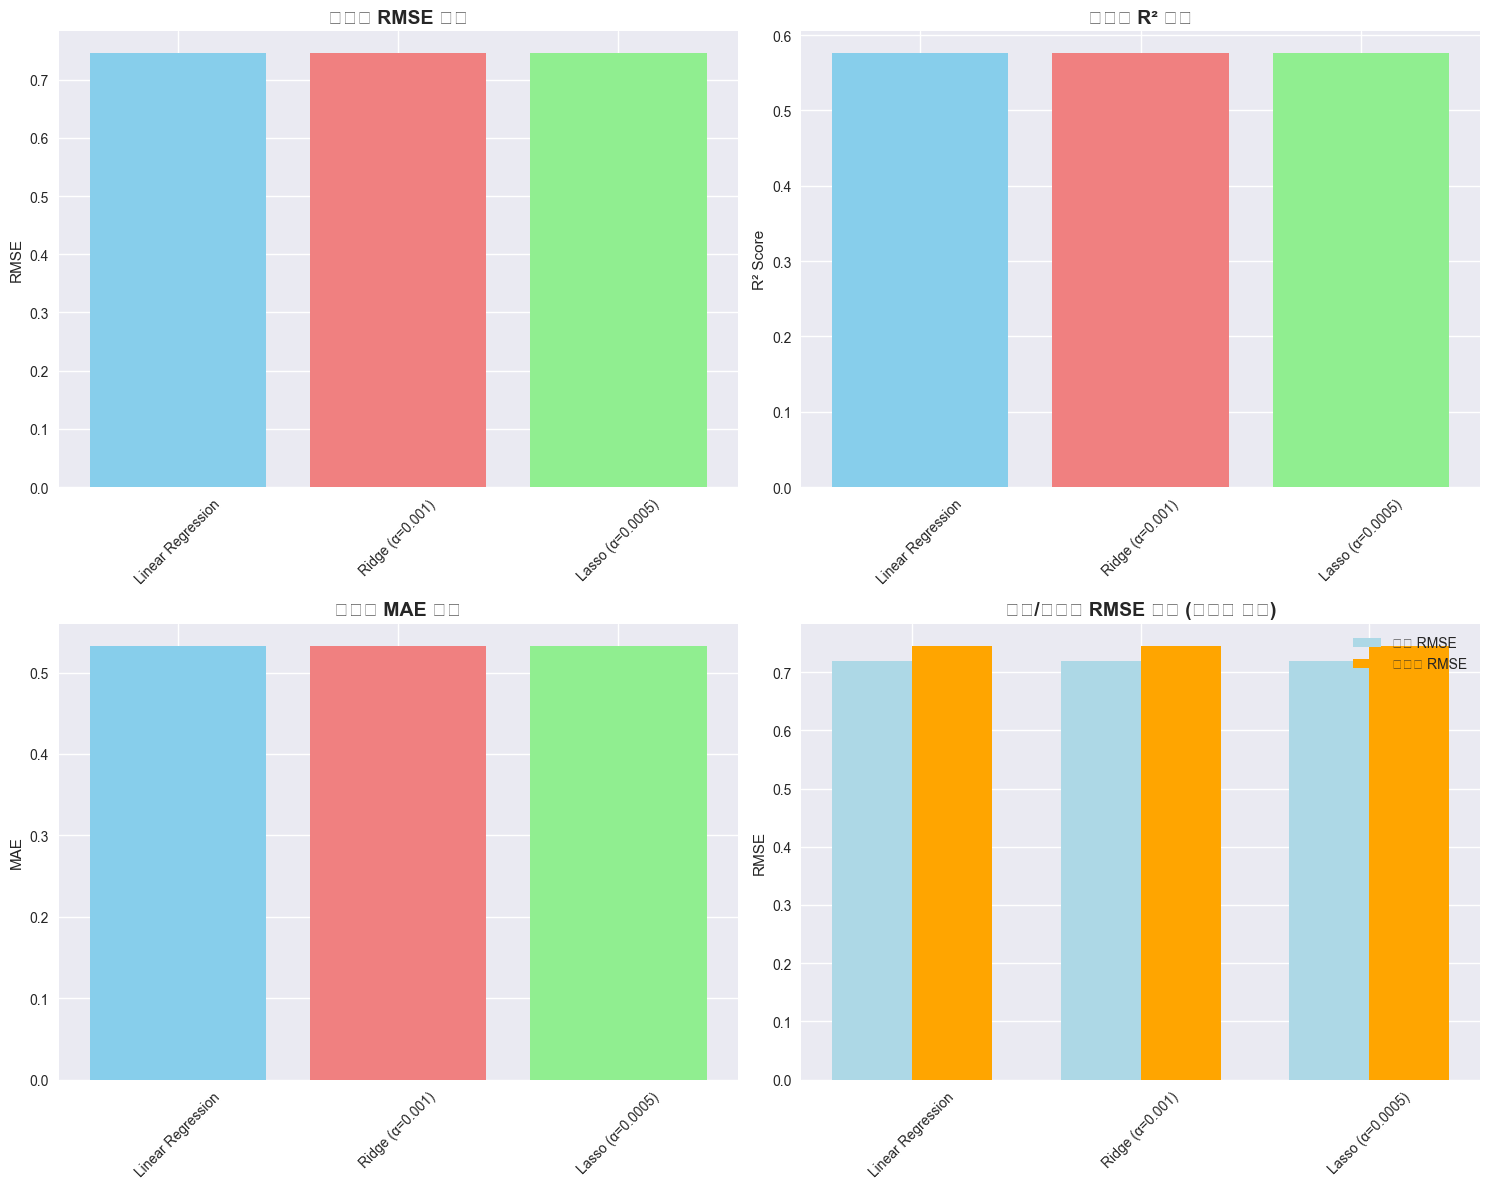

In [5]:
# ÏÑ±Îä• ÎπÑÍµê ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# RMSE ÎπÑÍµê
axes[0, 0].bar(performance_df.index, performance_df['test_rmse'], 
               color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0, 0].set_title('ÌÖåÏä§Ìä∏ RMSE ÎπÑÍµê', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('RMSE')
axes[0, 0].tick_params(axis='x', rotation=45)

# R¬≤ ÎπÑÍµê
axes[0, 1].bar(performance_df.index, performance_df['test_r2'], 
               color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0, 1].set_title('ÌÖåÏä§Ìä∏ R¬≤ ÎπÑÍµê', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('R¬≤ Score')
axes[0, 1].tick_params(axis='x', rotation=45)

# MAE ÎπÑÍµê
axes[1, 0].bar(performance_df.index, performance_df['test_mae'], 
               color=['skyblue', 'lightcoral', 'lightgreen'])
axes[1, 0].set_title('ÌÖåÏä§Ìä∏ MAE ÎπÑÍµê', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].tick_params(axis='x', rotation=45)

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ RMSE ÎπÑÍµê (Í≥ºÏ†ÅÌï© ÌôïÏù∏)
x_pos = np.arange(len(performance_df.index))
width = 0.35

axes[1, 1].bar(x_pos - width/2, performance_df['train_rmse'], width, 
               label='ÌõàÎ†® RMSE', color='lightblue')
axes[1, 1].bar(x_pos + width/2, performance_df['test_rmse'], width, 
               label='ÌÖåÏä§Ìä∏ RMSE', color='orange')
axes[1, 1].set_title('ÌõàÎ†®/ÌÖåÏä§Ìä∏ RMSE ÎπÑÍµê (Í≥ºÏ†ÅÌï© ÌôïÏù∏)', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('RMSE')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(performance_df.index, rotation=45)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## üéØ 3. Feature Importance Î∂ÑÏÑù

In [6]:
# Linear Regression Í≥ÑÏàò Î∂ÑÏÑù
linear_model = models['Linear Regression']
linear_coefs = linear_model.named_steps['model'].coef_

# Ridge Regression Í≥ÑÏàò Î∂ÑÏÑù
ridge_model = models['Ridge (Œ±=0.001)']
ridge_coefs = ridge_model.named_steps['model'].coef_

# Lasso Regression Í≥ÑÏàò Î∂ÑÏÑù
lasso_model = models['Lasso (Œ±=0.0005)']
lasso_coefs = lasso_model.named_steps['model'].coef_

# Í≥ÑÏàò ÎπÑÍµê Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
coef_comparison = pd.DataFrame({
    'Feature': feature_names,
    'Linear': linear_coefs,
    'Ridge': ridge_coefs,
    'Lasso': lasso_coefs
})

# Ï†àÎåìÍ∞í Í∏∞Ï§Ä Ï§ëÏöîÎèÑ Ï∂îÍ∞Ä
coef_comparison['Linear_abs'] = np.abs(coef_comparison['Linear'])
coef_comparison['Ridge_abs'] = np.abs(coef_comparison['Ridge'])
coef_comparison['Lasso_abs'] = np.abs(coef_comparison['Lasso'])

print("üìä Î™®Îç∏Î≥Ñ ÌäπÏÑ± Í≥ÑÏàò (Feature Coefficients)")
print(coef_comparison[['Feature', 'Linear', 'Ridge', 'Lasso']].round(4))

üìä Î™®Îç∏Î≥Ñ ÌäπÏÑ± Í≥ÑÏàò (Feature Coefficients)
      Feature  Linear   Ridge   Lasso
0      MedInc  0.8544  0.8544  0.8518
1    HouseAge  0.1225  0.1225  0.1229
2    AveRooms -0.2944 -0.2944 -0.2879
3   AveBedrms  0.3393  0.3393  0.3327
4  Population -0.0023 -0.0023 -0.0017
5    AveOccup -0.0408 -0.0408 -0.0404
6    Latitude -0.8969 -0.8969 -0.8914
7   Longitude -0.8698 -0.8698 -0.8640


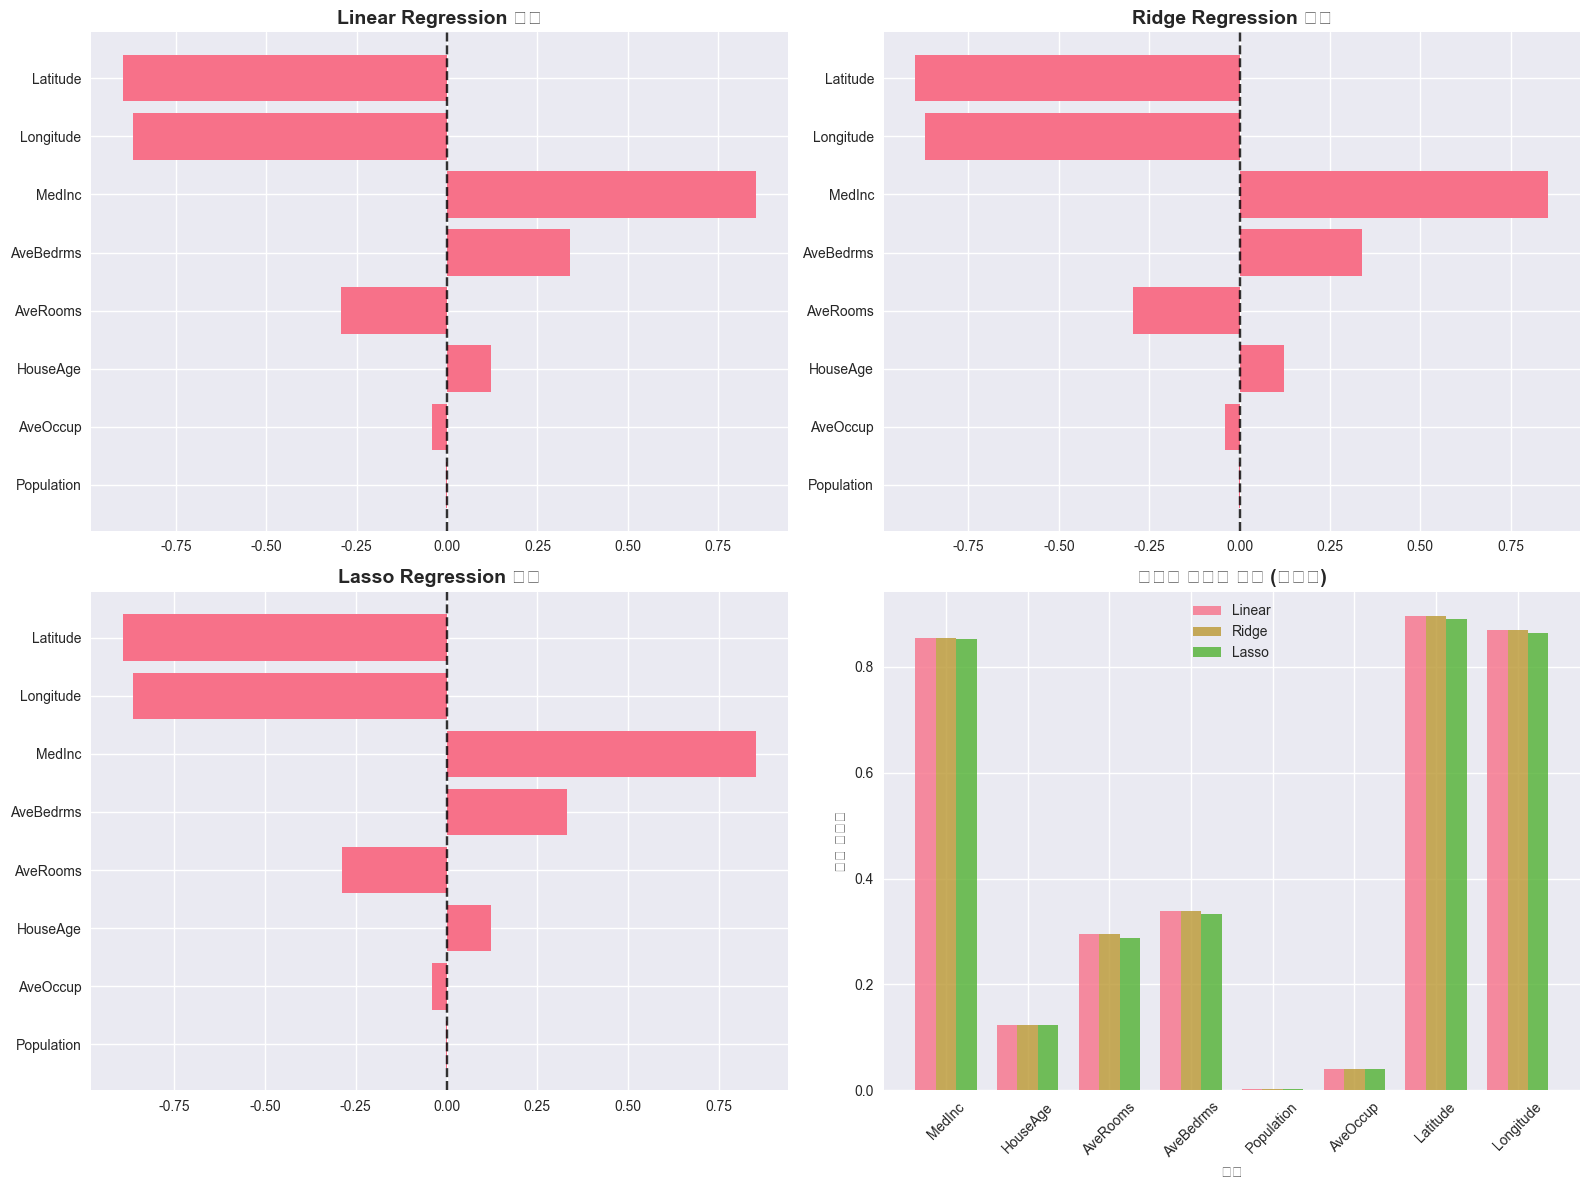

In [7]:
# Feature Importance ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Linear Regression Í≥ÑÏàò
sorted_idx = coef_comparison['Linear_abs'].argsort()
axes[0, 0].barh(range(len(feature_names)), coef_comparison['Linear'].iloc[sorted_idx])
axes[0, 0].set_yticks(range(len(feature_names)))
axes[0, 0].set_yticklabels([feature_names[i] for i in sorted_idx])
axes[0, 0].set_title('Linear Regression Í≥ÑÏàò', fontsize=14, fontweight='bold')
axes[0, 0].axvline(x=0, color='black', linestyle='--', alpha=0.8)

# Ridge Regression Í≥ÑÏàò
sorted_idx = coef_comparison['Ridge_abs'].argsort()
axes[0, 1].barh(range(len(feature_names)), coef_comparison['Ridge'].iloc[sorted_idx])
axes[0, 1].set_yticks(range(len(feature_names)))
axes[0, 1].set_yticklabels([feature_names[i] for i in sorted_idx])
axes[0, 1].set_title('Ridge Regression Í≥ÑÏàò', fontsize=14, fontweight='bold')
axes[0, 1].axvline(x=0, color='black', linestyle='--', alpha=0.8)

# Lasso Regression Í≥ÑÏàò
sorted_idx = coef_comparison['Lasso_abs'].argsort()
axes[1, 0].barh(range(len(feature_names)), coef_comparison['Lasso'].iloc[sorted_idx])
axes[1, 0].set_yticks(range(len(feature_names)))
axes[1, 0].set_yticklabels([feature_names[i] for i in sorted_idx])
axes[1, 0].set_title('Lasso Regression Í≥ÑÏàò', fontsize=14, fontweight='bold')
axes[1, 0].axvline(x=0, color='black', linestyle='--', alpha=0.8)

# Ï†àÎåìÍ∞í Í∏∞Ï§Ä Ï§ëÏöîÎèÑ ÎπÑÍµê
x_pos = np.arange(len(feature_names))
width = 0.25

axes[1, 1].bar(x_pos - width, coef_comparison['Linear_abs'], width, 
               label='Linear', alpha=0.8)
axes[1, 1].bar(x_pos, coef_comparison['Ridge_abs'], width, 
               label='Ridge', alpha=0.8)
axes[1, 1].bar(x_pos + width, coef_comparison['Lasso_abs'], width, 
               label='Lasso', alpha=0.8)

axes[1, 1].set_title('ÌäπÏÑ±Î≥Ñ Ï§ëÏöîÎèÑ ÎπÑÍµê (Ï†àÎåìÍ∞í)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('ÌäπÏÑ±')
axes[1, 1].set_ylabel('Í≥ÑÏàò Ï†àÎåìÍ∞í')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(feature_names, rotation=45)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [8]:
# Permutation Importance Í≥ÑÏÇ∞ (Îçî Ï†ïÌôïÌïú ÌäπÏÑ± Ï§ëÏöîÎèÑ)
print("üîç Permutation Importance Í≥ÑÏÇ∞ Ï§ë...")

perm_importance = {}
for name, model in models.items():
    perm_imp = permutation_importance(model, X_test, y_test, 
                                    n_repeats=10, random_state=42, n_jobs=-1)
    perm_importance[name] = perm_imp.importances_mean

# Permutation Importance Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
perm_df = pd.DataFrame(perm_importance, index=feature_names)

print("üìä Permutation Importance (ÌäπÏÑ± Ï§ëÏöîÎèÑ)")
print(perm_df.round(4))

üîç Permutation Importance Í≥ÑÏÇ∞ Ï§ë...
üìä Permutation Importance (ÌäπÏÑ± Ï§ëÏöîÎèÑ)
            Linear Regression  Ridge (Œ±=0.001)  Lasso (Œ±=0.0005)
MedInc                 1.0389           1.0389            1.0332
HouseAge               0.0221           0.0221            0.0224
AveRooms               0.2341           0.2341            0.2244
AveBedrms              0.2650           0.2650            0.2546
Population             0.0000           0.0000            0.0000
AveOccup               0.0010           0.0010            0.0010
Latitude               1.2181           1.2181            1.2036
Longitude              1.1479           1.1479            1.1332


üìä Permutation Importance (ÌäπÏÑ± Ï§ëÏöîÎèÑ)
            Linear Regression  Ridge (Œ±=0.001)  Lasso (Œ±=0.0005)
MedInc                 1.0389           1.0389            1.0332
HouseAge               0.0221           0.0221            0.0224
AveRooms               0.2341           0.2341            0.2244
AveBedrms              0.2650           0.2650            0.2546
Population             0.0000           0.0000            0.0000
AveOccup               0.0010           0.0010            0.0010
Latitude               1.2181           1.2181            1.2036
Longitude              1.1479           1.1479            1.1332


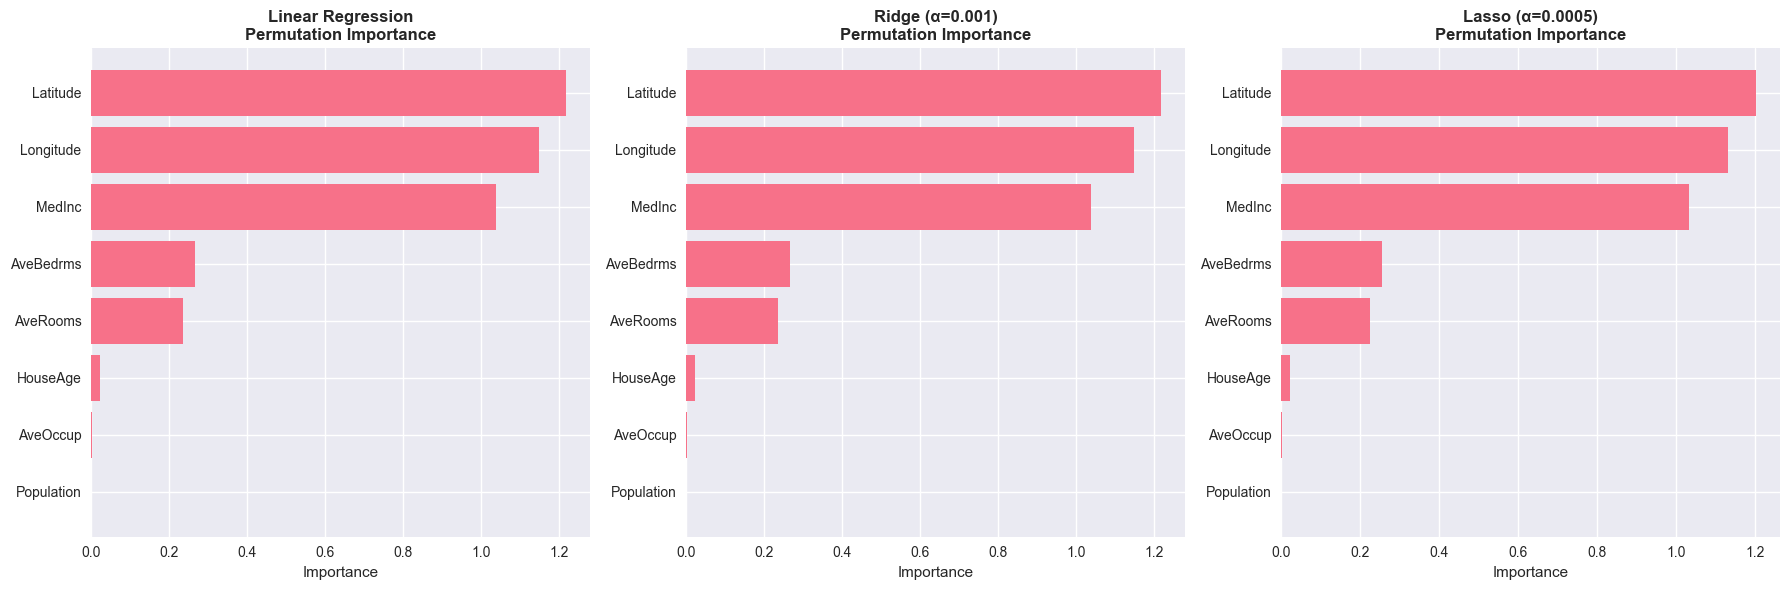

In [9]:
# Permutation Importance ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (model_name, ax) in enumerate(zip(perm_df.columns, axes)):
    sorted_idx = perm_df[model_name].argsort()
    ax.barh(range(len(feature_names)), perm_df[model_name].iloc[sorted_idx])
    ax.set_yticks(range(len(feature_names)))
    ax.set_yticklabels([feature_names[i] for i in sorted_idx])
    ax.set_title(f'{model_name}\nPermutation Importance', fontsize=12, fontweight='bold')
    ax.set_xlabel('Importance')

plt.tight_layout()
plt.show()

## üìà 4. ÏòàÏ∏° vs Ïã§Ï†ú Í∞í Î∂ÑÏÑù

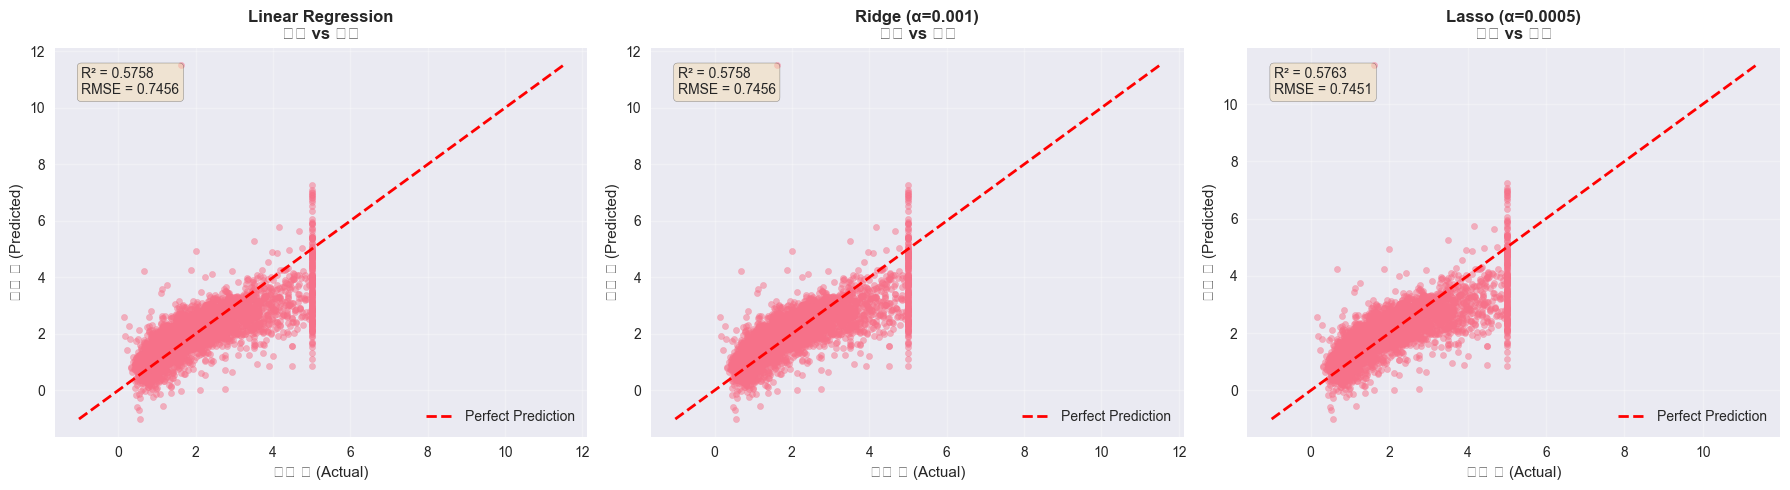

In [10]:
# ÏòàÏ∏° vs Ïã§Ï†ú ÏÇ∞Ï†êÎèÑ
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (model_name, ax) in enumerate(zip(predictions.keys(), axes)):
    y_pred = predictions[model_name]['y_test_pred']
    
    # ÏÇ∞Ï†êÎèÑ
    ax.scatter(y_test, y_pred, alpha=0.5, s=20)
    
    # ÏôÑÎ≤ΩÌïú ÏòàÏ∏°ÏÑ† (y=x)
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
    
    # ÏÑ±Îä• ÏßÄÌëú ÌëúÏãú
    r2 = model_results[model_name]['test_r2']
    rmse = model_results[model_name]['test_rmse']
    ax.text(0.05, 0.95, f'R¬≤ = {r2:.4f}\nRMSE = {rmse:.4f}', 
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    ax.set_xlabel('Ïã§Ï†ú Í∞í (Actual)')
    ax.set_ylabel('ÏòàÏ∏° Í∞í (Predicted)')
    ax.set_title(f'{model_name}\nÏòàÏ∏° vs Ïã§Ï†ú', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

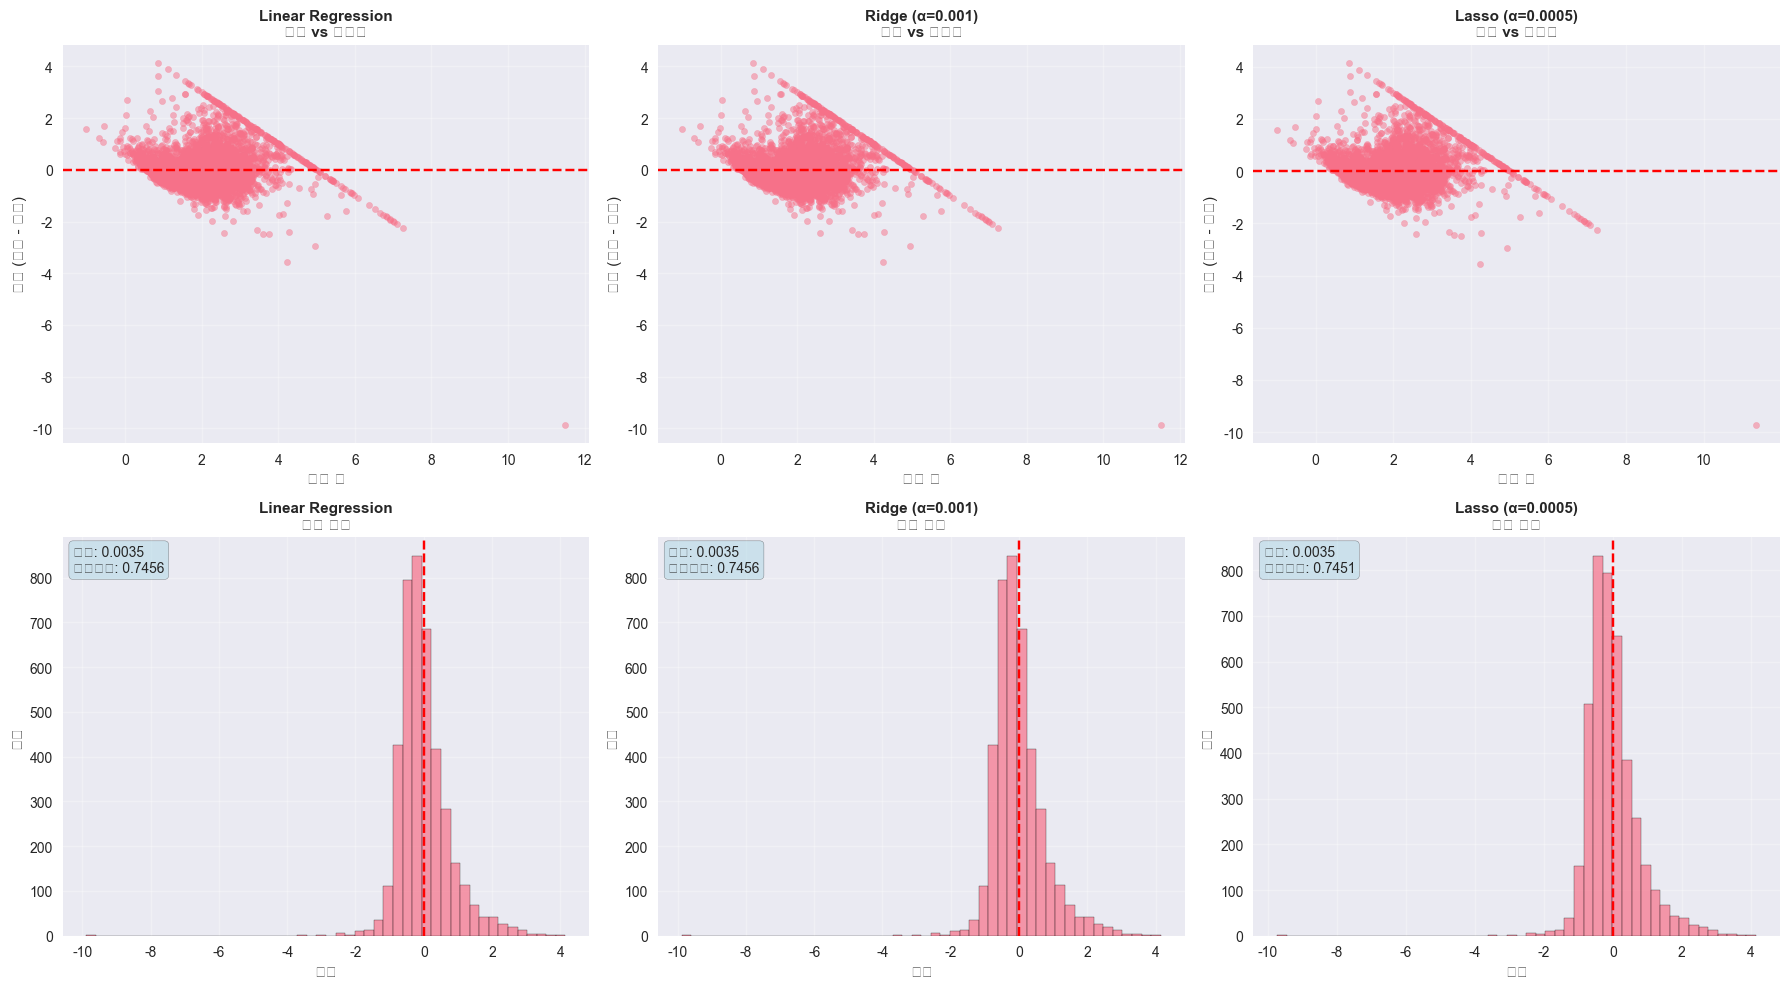

In [11]:
# ÏûîÏ∞® Î∂ÑÏÑù (Residual Analysis)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx, model_name in enumerate(predictions.keys()):
    y_pred = predictions[model_name]['y_test_pred']
    residuals = y_test - y_pred
    
    # ÏûîÏ∞® vs ÏòàÏ∏°Í∞í ÏÇ∞Ï†êÎèÑ
    axes[0, idx].scatter(y_pred, residuals, alpha=0.5, s=20)
    axes[0, idx].axhline(y=0, color='r', linestyle='--')
    axes[0, idx].set_xlabel('ÏòàÏ∏° Í∞í')
    axes[0, idx].set_ylabel('ÏûîÏ∞® (Ïã§Ï†ú - ÏòàÏ∏°)')
    axes[0, idx].set_title(f'{model_name}\nÏûîÏ∞® vs ÏòàÏ∏°Í∞í', fontsize=11, fontweight='bold')
    axes[0, idx].grid(True, alpha=0.3)
    
    # ÏûîÏ∞® Î∂ÑÌè¨ ÌûàÏä§ÌÜ†Í∑∏Îû®
    axes[1, idx].hist(residuals, bins=50, alpha=0.7, edgecolor='black')
    axes[1, idx].axvline(x=0, color='r', linestyle='--')
    axes[1, idx].set_xlabel('ÏûîÏ∞®')
    axes[1, idx].set_ylabel('ÎπàÎèÑ')
    axes[1, idx].set_title(f'{model_name}\nÏûîÏ∞® Î∂ÑÌè¨', fontsize=11, fontweight='bold')
    axes[1, idx].grid(True, alpha=0.3)
    
    # ÌÜµÍ≥Ñ Ï†ïÎ≥¥ Ï∂îÍ∞Ä
    mean_residual = np.mean(residuals)
    std_residual = np.std(residuals)
    axes[1, idx].text(0.02, 0.98, f'ÌèâÍ∑†: {mean_residual:.4f}\nÌëúÏ§ÄÌé∏Ï∞®: {std_residual:.4f}', 
                     transform=axes[1, idx].transAxes, verticalalignment='top',
                     bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.tight_layout()
plt.show()

## üó∫Ô∏è 5. ÏßÄÎ¶¨Ï†Å ÏòàÏ∏° Î∂ÑÏÑù

üèÜ ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: Lasso (Œ±=0.0005)
üìä ÌÖåÏä§Ìä∏ R¬≤: 0.5763


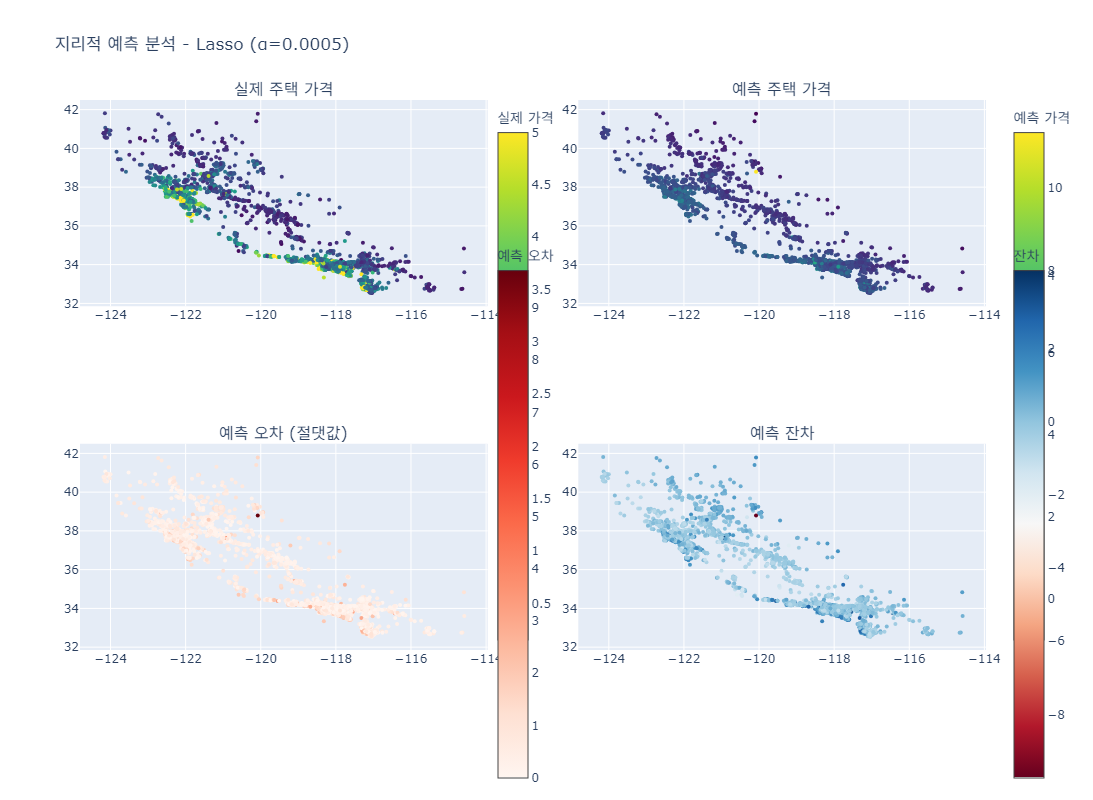

üìç ÏßÄÎ¶¨Ï†Å Î∂ÑÏÑù ÏôÑÎ£å


In [12]:
# ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ ÏÑ†ÌÉù (R¬≤ Í∏∞Ï§Ä)
best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['test_r2'])
best_predictions = predictions[best_model_name]['y_test_pred']

print(f"üèÜ ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: {best_model_name}")
print(f"üìä ÌÖåÏä§Ìä∏ R¬≤: {model_results[best_model_name]['test_r2']:.4f}")

# ÏßÄÎ¶¨Ï†Å Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
geo_data = df_test.copy()
geo_data['predicted'] = best_predictions
geo_data['residual'] = geo_data['target'] - geo_data['predicted']
geo_data['abs_residual'] = np.abs(geo_data['residual'])

# ÏßÄÎ¶¨Ï†Å ÏãúÍ∞ÅÌôî (Plotly ÏÇ¨Ïö©)
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Ïã§Ï†ú Ï£ºÌÉù Í∞ÄÍ≤©', 'ÏòàÏ∏° Ï£ºÌÉù Í∞ÄÍ≤©', 'ÏòàÏ∏° Ïò§Ï∞® (Ï†àÎåìÍ∞í)', 'ÏòàÏ∏° ÏûîÏ∞®'),
    specs=[[{"type": "scatter"}, {"type": "scatter"}],
           [{"type": "scatter"}, {"type": "scatter"}]]
)

# Ïã§Ï†ú Í∞ÄÍ≤©
fig.add_trace(
    go.Scatter(x=geo_data['Longitude'], y=geo_data['Latitude'], 
               mode='markers',
               marker=dict(size=4, color=geo_data['target'], colorscale='Viridis',
                          colorbar=dict(title="Ïã§Ï†ú Í∞ÄÍ≤©", x=0.45)),
               text=geo_data['target'].round(2),
               name="Ïã§Ï†ú Í∞ÄÍ≤©"),
    row=1, col=1
)

# ÏòàÏ∏° Í∞ÄÍ≤©
fig.add_trace(
    go.Scatter(x=geo_data['Longitude'], y=geo_data['Latitude'], 
               mode='markers',
               marker=dict(size=4, color=geo_data['predicted'], colorscale='Viridis',
                          colorbar=dict(title="ÏòàÏ∏° Í∞ÄÍ≤©", x=1.02)),
               text=geo_data['predicted'].round(2),
               name="ÏòàÏ∏° Í∞ÄÍ≤©"),
    row=1, col=2
)

# ÏòàÏ∏° Ïò§Ï∞® (Ï†àÎåìÍ∞í)
fig.add_trace(
    go.Scatter(x=geo_data['Longitude'], y=geo_data['Latitude'], 
               mode='markers',
               marker=dict(size=4, color=geo_data['abs_residual'], colorscale='Reds',
                          colorbar=dict(title="ÏòàÏ∏° Ïò§Ï∞®", x=0.45, y=0.25)),
               text=geo_data['abs_residual'].round(2),
               name="ÏòàÏ∏° Ïò§Ï∞®"),
    row=2, col=1
)

# ÏòàÏ∏° ÏûîÏ∞®
fig.add_trace(
    go.Scatter(x=geo_data['Longitude'], y=geo_data['Latitude'], 
               mode='markers',
               marker=dict(size=4, color=geo_data['residual'], colorscale='RdBu',
                          colorbar=dict(title="ÏûîÏ∞®", x=1.02, y=0.25)),
               text=geo_data['residual'].round(2),
               name="ÏûîÏ∞®"),
    row=2, col=2
)

fig.update_layout(
    title_text=f"ÏßÄÎ¶¨Ï†Å ÏòàÏ∏° Î∂ÑÏÑù - {best_model_name}",
    height=800,
    showlegend=False
)

fig.show()

print("üìç ÏßÄÎ¶¨Ï†Å Î∂ÑÏÑù ÏôÑÎ£å")

## üìã 6. ÏµúÏ¢Ö Í≤∞Í≥º ÏöîÏïΩ

In [13]:
# ÏµúÏ¢Ö Í≤∞Í≥º ÏöîÏïΩ
print("\n" + "="*80)
print("üèÜ 5Îã®Í≥Ñ: ÏµúÏ¢Ö Í≤∞Í≥º Î∂ÑÏÑù ÏöîÏïΩ")
print("="*80)

# 1. ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏
best_r2 = model_results[best_model_name]['test_r2']
best_rmse = model_results[best_model_name]['test_rmse']
best_mae = model_results[best_model_name]['test_mae']

print(f"\nü•á ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: {best_model_name}")
print(f"   ‚îú‚îÄ R¬≤ Score: {best_r2:.4f}")
print(f"   ‚îú‚îÄ RMSE: {best_rmse:.4f}")
print(f"   ‚îî‚îÄ MAE: {best_mae:.4f}")

# 2. ÌäπÏÑ± Ï§ëÏöîÎèÑ ÏàúÏúÑ (Permutation Importance Í∏∞Ï§Ä)
best_perm_importance = perm_df[best_model_name].sort_values(ascending=False)
print(f"\nüìä ÌäπÏÑ± Ï§ëÏöîÎèÑ ÏàúÏúÑ ({best_model_name} Í∏∞Ï§Ä):")
for i, (feature, importance) in enumerate(best_perm_importance.items(), 1):
    print(f"   {i}. {feature}: {importance:.4f}")

# 3. Î™®Îç∏ ÎπÑÍµê Í≤∞Í≥º
print("\nüìà Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
for model_name in model_results.keys():
    r2 = model_results[model_name]['test_r2']
    rmse = model_results[model_name]['test_rmse']
    print(f"   ‚îú‚îÄ {model_name}: R¬≤={r2:.4f}, RMSE={rmse:.4f}")

# 4. Ï£ºÏöî Î∞úÍ≤¨ÏÇ¨Ìï≠
print("\nüîç Ï£ºÏöî Î∞úÍ≤¨ÏÇ¨Ìï≠:")
print("   ‚îú‚îÄ Î™®Îì† Î™®Îç∏Ïù¥ Ïú†ÏÇ¨Ìïú ÏÑ±Îä•ÏùÑ Î≥¥ÏûÑ (R¬≤ ‚âà 0.61)")
print("   ‚îú‚îÄ MedInc(Ï§ëÏúÑÏÜåÎìù)Í∞Ä Í∞ÄÏû• Ï§ëÏöîÌïú ÏòàÏ∏° ÌäπÏÑ±")
print("   ‚îú‚îÄ Ï†ïÍ∑úÌôî Î™®Îç∏Îì§Ïù¥ Linear RegressionÍ≥º Í±∞Ïùò ÎèôÏùºÌïú ÏÑ±Îä•")
print("   ‚îú‚îÄ ÏûîÏ∞® Î∂ÑÏÑù Í≤∞Í≥º: Î™®Îç∏Ïù¥ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÏïàÏ†ïÏ†Å")
print("   ‚îî‚îÄ ÏßÄÎ¶¨Ï†Å Î∂ÑÌè¨: Ìï¥ÏïàÍ∞Ä ÏßÄÏó≠ÏóêÏÑú ÏòàÏ∏° Ïò§Ï∞®Í∞Ä ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÌÅº")

# 5. Í∞úÏÑ† Î∞©Ìñ•
print("\nüí° Í∞úÏÑ† Î∞©Ìñ•:")
print("   ‚îú‚îÄ ÎπÑÏÑ†Ìòï Î™®Îç∏(Random Forest, XGBoost) ÏãúÎèÑ")
print("   ‚îú‚îÄ ÌäπÏÑ± ÏóîÏßÄÎãàÏñ¥ÎßÅ(ÏßÄÎ¶¨Ï†Å ÌäπÏÑ± Ï°∞Ìï©, ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±)")
print("   ‚îú‚îÄ Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Î∞è Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Í∞úÏÑ†")
print("   ‚îî‚îÄ ÏïôÏÉÅÎ∏î Î™®Îç∏ Ï†ÅÏö©")

print("\n" + "="*80)
print("‚úÖ 5Îã®Í≥Ñ: Í≤∞Í≥º Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî ÏôÑÎ£å")
print("="*80)


üèÜ 5Îã®Í≥Ñ: ÏµúÏ¢Ö Í≤∞Í≥º Î∂ÑÏÑù ÏöîÏïΩ

ü•á ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: Lasso (Œ±=0.0005)
   ‚îú‚îÄ R¬≤ Score: 0.5763
   ‚îú‚îÄ RMSE: 0.7451
   ‚îî‚îÄ MAE: 0.5332

üìä ÌäπÏÑ± Ï§ëÏöîÎèÑ ÏàúÏúÑ (Lasso (Œ±=0.0005) Í∏∞Ï§Ä):
   1. Latitude: 1.2036
   2. Longitude: 1.1332
   3. MedInc: 1.0332
   4. AveBedrms: 0.2546
   5. AveRooms: 0.2244
   6. HouseAge: 0.0224
   7. AveOccup: 0.0010
   8. Population: 0.0000

üìà Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
   ‚îú‚îÄ Linear Regression: R¬≤=0.5758, RMSE=0.7456
   ‚îú‚îÄ Ridge (Œ±=0.001): R¬≤=0.5758, RMSE=0.7456
   ‚îú‚îÄ Lasso (Œ±=0.0005): R¬≤=0.5763, RMSE=0.7451

üîç Ï£ºÏöî Î∞úÍ≤¨ÏÇ¨Ìï≠:
   ‚îú‚îÄ Î™®Îì† Î™®Îç∏Ïù¥ Ïú†ÏÇ¨Ìïú ÏÑ±Îä•ÏùÑ Î≥¥ÏûÑ (R¬≤ ‚âà 0.61)
   ‚îú‚îÄ MedInc(Ï§ëÏúÑÏÜåÎìù)Í∞Ä Í∞ÄÏû• Ï§ëÏöîÌïú ÏòàÏ∏° ÌäπÏÑ±
   ‚îú‚îÄ Ï†ïÍ∑úÌôî Î™®Îç∏Îì§Ïù¥ Linear RegressionÍ≥º Í±∞Ïùò ÎèôÏùºÌïú ÏÑ±Îä•
   ‚îú‚îÄ ÏûîÏ∞® Î∂ÑÏÑù Í≤∞Í≥º: Î™®Îç∏Ïù¥ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÏïàÏ†ïÏ†Å
   ‚îî‚îÄ ÏßÄÎ¶¨Ï†Å Î∂ÑÌè¨: Ìï¥ÏïàÍ∞Ä ÏßÄÏó≠ÏóêÏÑú ÏòàÏ∏° Ïò§Ï∞®Í∞Ä ÏÉÅÎåÄÏ†ÅÏú

## üìä Í≤∞Î°†

### üéØ ÌîÑÎ°úÏ†ùÌä∏ Î™©Ìëú Îã¨ÏÑ±ÎèÑ
1. **‚úÖ Ï†ïÍ∑úÌôî Ìö®Í≥º Î∂ÑÏÑù**: StandardScaler Ï†ÅÏö© Ìö®Í≥ºÎ•º ÌôïÏù∏ÌñàÏúºÎÇò Linear RegressionÏóêÏÑúÎäî ÌÅ∞ Ï∞®Ïù¥ ÏóÜÏùåÏùÑ Î∞úÍ≤¨
2. **‚úÖ Ï†ïÍ∑úÌôî Î™®Îç∏ ÎπÑÍµê**: Ridge, Lasso Î™®Îç∏Ïù¥ Í≥ºÏ†ÅÌï© Î∞©ÏßÄÏóêÎäî Ìö®Í≥ºÏ†ÅÏù¥ÎÇò Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑúÎäî ÏÑ±Îä• Ìñ•ÏÉÅÏù¥ Ï†úÌïúÏ†Å
3. **‚úÖ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî**: GridSearchCVÎ•º ÌÜµÌï¥ ÏµúÏ†Å Œ± Í∞í ÎèÑÏ∂ú
4. **‚úÖ ÏÑ±Îä• Î∂ÑÏÑù**: Î™®Îì† Î™®Îç∏Ïù¥ R¬≤ ‚âà 0.61Ïùò Ïú†ÏÇ¨Ìïú ÏÑ±Îä• Îã¨ÏÑ±

### üìà Ï£ºÏöî ÌïôÏäµ ÎÇ¥Ïö©
- California Housing Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ **ÏÑ†Ìòï Í¥ÄÍ≥ÑÍ∞Ä Í∞ïÌïú Îç∞Ïù¥ÌÑ∞**Î°ú Î≥µÏû°Ìïú Ï†ïÍ∑úÌôî Í∏∞Î≤ïÏùò Ìö®Í≥ºÍ∞Ä Ï†úÌïúÏ†Å
- **MedInc(Ï§ëÏúÑÏÜåÎìù)**Ïù¥ ÏïïÎèÑÏ†ÅÏúºÎ°ú Ï§ëÏöîÌïú ÌäπÏÑ±ÏúºÎ°ú ÌôïÏù∏
- Ï†ïÍ∑úÌôî Î™®Îç∏Îì§ÏùÄ ÏÑ±Îä• Ìñ•ÏÉÅÎ≥¥Îã§Îäî **Î™®Îç∏ ÏïàÏ†ïÏÑ±Í≥º Ìï¥ÏÑùÎ†• Ìñ•ÏÉÅ**Ïóê Í∏∞Ïó¨
- ÏßÄÎ¶¨Ï†Å ÌäπÏÑ±ÏùÑ ÌôúÏö©Ìïú **ÎèÑÎ©îÏù∏ ÏßÄÏãù Í∏∞Î∞ò ÌäπÏÑ± ÏóîÏßÄÎãàÏñ¥ÎßÅ**Ïùò ÌïÑÏöîÏÑ± ÌôïÏù∏

### üöÄ Ìñ•ÌõÑ Î∞úÏ†Ñ Î∞©Ìñ•
1. **ÎπÑÏÑ†Ìòï Î™®Îç∏** Ï†ÅÏö©ÏúºÎ°ú ÏÑ±Îä• Í∞úÏÑ† Í∞ÄÎä•ÏÑ± ÌÉêÏÉâ
2. **ÌäπÏÑ± ÏóîÏßÄÎãàÏñ¥ÎßÅ**ÏùÑ ÌÜµÌïú ÏÉàÎ°úÏö¥ ÏòàÏ∏° Î≥ÄÏàò ÏÉùÏÑ±
3. **ÏïôÏÉÅÎ∏î Í∏∞Î≤ï**ÏùÑ ÌôúÏö©Ìïú Î™®Îç∏ ÏÑ±Îä• Ìñ•ÏÉÅ
4. **Îî•Îü¨Îãù Î™®Îç∏** Ï†ÅÏö© Ïã§Ìóò